In [ ]:
pip install pandas matplotlib seaborn folium

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load data
df = pd.read_csv('/content/Meteorite_Landings.csv')

# Inspect data
df.head(10)

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775, 6.08333)"
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.18333, 10.23333)"
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.21667, -113.0)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000,"(16.88333, -99.9)"
4,Achiras,370,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000,"(-33.16667, -64.95)"
5,Adhi Kot,379,Valid,EH4,4239.0,Fell,1919.0,32.10000,71.80000,"(32.1, 71.8)"
6,Adzhi-Bogdo (stone),390,Valid,LL3-6,910.0,Fell,1949.0,44.83333,95.16667,"(44.83333, 95.16667)"
7,Agen,392,Valid,H5,30000.0,Fell,1814.0,44.21667,0.61667,"(44.21667, 0.61667)"
8,Aguada,398,Valid,L6,1620.0,Fell,1930.0,-31.60000,-65.23333,"(-31.6, -65.23333)"
9,Aguila Blanca,417,Valid,L,1440.0,Fell,1920.0,-30.86667,-64.55000,"(-30.86667, -64.55)"


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45716 entries, 0 to 45715
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         45716 non-null  object 
 1   id           45716 non-null  int64  
 2   nametype     45716 non-null  object 
 3   recclass     45716 non-null  object 
 4   mass (g)     45585 non-null  float64
 5   fall         45716 non-null  object 
 6   year         45425 non-null  float64
 7   reclat       38401 non-null  float64
 8   reclong      38401 non-null  float64
 9   GeoLocation  38401 non-null  object 
dtypes: float64(4), int64(1), object(5)
memory usage: 3.5+ MB


In [ ]:
df.describe()

,id,mass (g),year,reclat,reclong
count,45716.000000,4.558500e+04,45425.000000,38401.000000,38401.000000
mean,26889.735104,1.327808e+04,1991.828817,-39.122580,61.074319
std,16860.683030,5.749889e+05,25.052766,46.378511,80.647298
min,1.000000,0.000000e+00,860.000000,-87.366670,-165.433330
25%,12688.750000,7.200000e+00,1987.000000,-76.714240,0.000000
50%,24261.500000,3.260000e+01,1998.000000,-71.500000,35.666670
75%,40656.750000,2.026000e+02,2003.000000,0.000000,157.166670
max,57458.000000,6.000000e+07,2101.000000,81.166670,354.473330


In [ ]:
df.isnull().sum()

,0
name,0
id,0
nametype,0
recclass,0
mass (g),131
fall,0
year,291
reclat,7315
reclong,7315
GeoLocation,7315


In [ ]:
# Fill missing mass with median
df["mass (g)"].fillna(df["mass (g)"].median(), inplace=True)

# Fill missing year with the median
df["year"].fillna(df["year"].median(), inplace=True)

# Drop rows where reclat or reclong is missing
df.dropna(subset=["reclat", "reclong"], inplace=True)

# Recreate GeoLocation from reclat and reclong if missing
df["GeoLocation"] = df.apply(lambda row: f"({row['reclat']}, {row['reclong']})" if pd.notnull(row['reclat']) else None, axis=1)

<ipython-input-7-00512bb1ff33>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["mass (g)"].fillna(df["mass (g)"].median(), inplace=True)
<ipython-input-7-00512bb1ff33>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)'

In [ ]:
df.isnull().sum()

,0
name,0
id,0
nametype,0
recclass,0
mass (g),0
fall,0
year,0
reclat,0
reclong,0
GeoLocation,0


In [ ]:
# Cap mass (e.g., remove outliers beyond 99th percentile)
mass_cap = df["mass (g)"].quantile(0.99)
df = df[df["mass (g)"] <= mass_cap]

# Cap year to exclude future anomalies
df = df[df["year"] <= 2025]

In [ ]:
df["year"] = df["year"].astype(int)

In [ ]:
top_heaviest = df.nlargest(5, "mass (g)")
print("Top 5 Heaviest Meteorites:")
print(top_heaviest[["name", "mass (g)", "year"]])

Top 5 Heaviest Meteorites:
                     name  mass (g)  year
1011               Treysa   63000.0  1916
6866   Derrick Peak 88017   63000.0  1988
36883         Santa Clara   63000.0  1976
37871      Tanezrouft 072   62285.0  2002
38010              Thunda   62100.0  1881


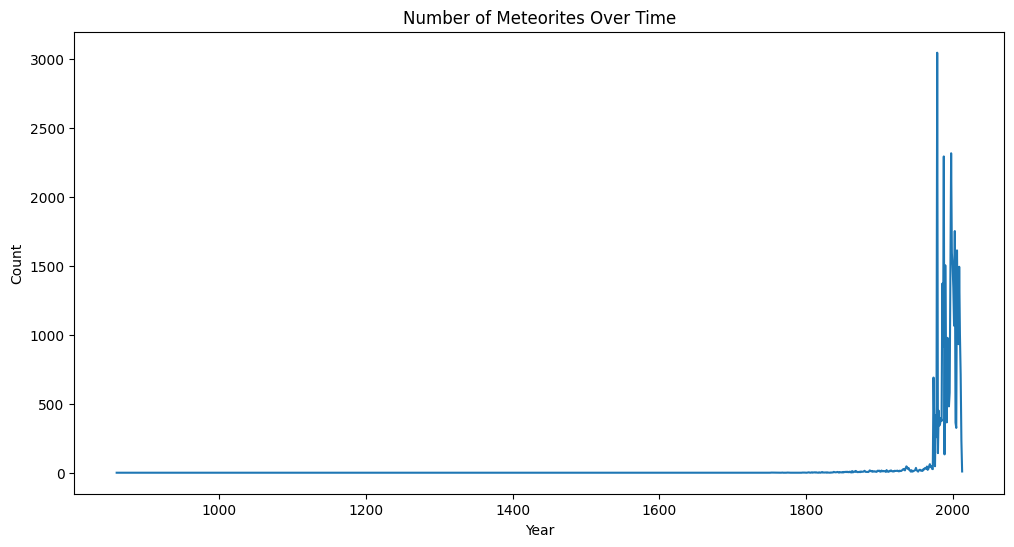

In [ ]:
df.groupby("year").size().plot(kind="line", figsize=(12, 6), title="Number of Meteorites Over Time")
plt.xlabel("Year")
plt.ylabel("Count")
plt.show()

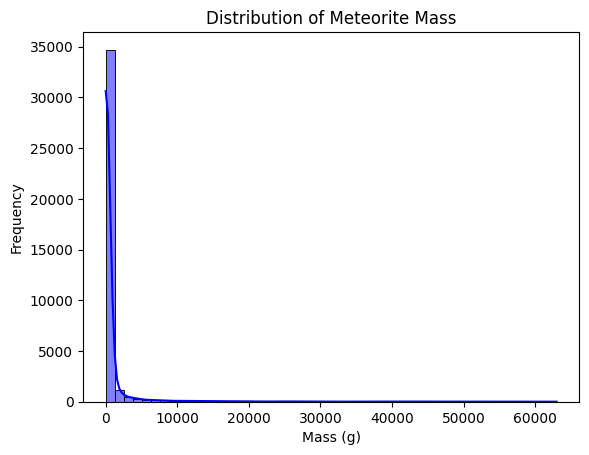

In [ ]:
sns.histplot(df["mass (g)"], bins=50, kde=True, color="blue")
plt.title("Distribution of Meteorite Mass")
plt.xlabel("Mass (g)")
plt.ylabel("Frequency")
plt.show()

In [ ]:
import plotly.express as px

# Filter data with valid coordinates
filtered_data = df.dropna(subset=["reclat", "reclong"])

# Create a scatter mapbox plot
fig = px.scatter_geo(
    filtered_data,
    lat="reclat",
    lon="reclong",
    hover_name="name",
    hover_data={"mass (g)": True, "year": True},
    title="Meteorite Landings",
)

# Update map layout
fig.update_layout(geo=dict(projection_scale=1.5, center={"lat": 0, "lon": 0}))

# Show the map
fig.show()


          mass (g)      year    reclat   reclong
mass (g)  1.000000 -0.302303  0.239134 -0.166283
year     -0.302303  1.000000 -0.080674  0.068944
reclat    0.239134 -0.080674  1.000000 -0.590717
reclong  -0.166283  0.068944 -0.590717  1.000000


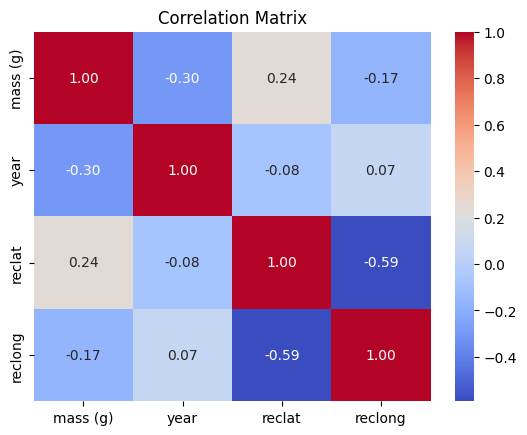

In [ ]:
correlation_matrix = df[["mass (g)", "year", "reclat", "reclong"]].corr()
print(correlation_matrix)
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


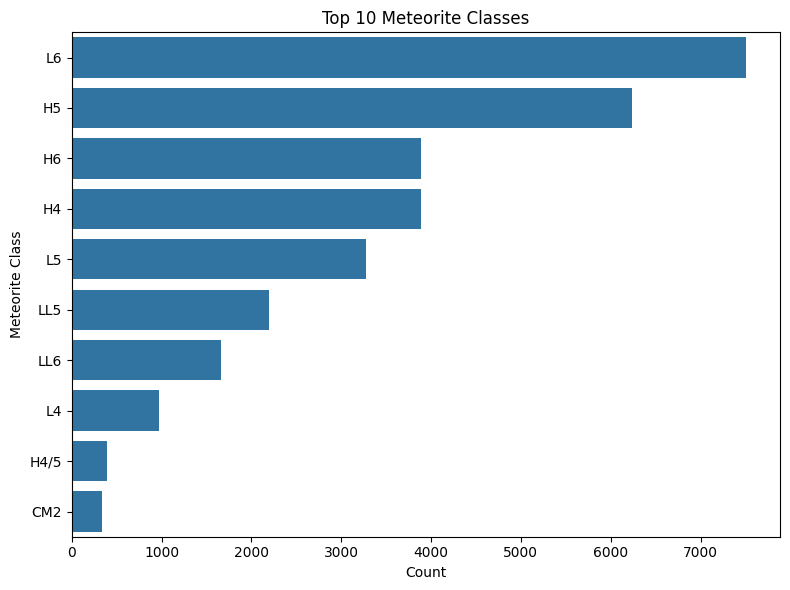

In [ ]:
# Get the top 10 most common meteorite classes
top_10_classes = df["recclass"].value_counts().nlargest(10)

# Create the barplot for the top 10 classes
plt.figure(figsize=(8, 6))
sns.barplot(y=top_10_classes.index, x=top_10_classes.values, orient="h")

# Add title and labels
plt.title("Top 10 Meteorite Classes")
plt.xlabel("Count")
plt.ylabel("Meteorite Class")
plt.tight_layout()  # Adjusts the layout to prevent label cut-off

plt.show()

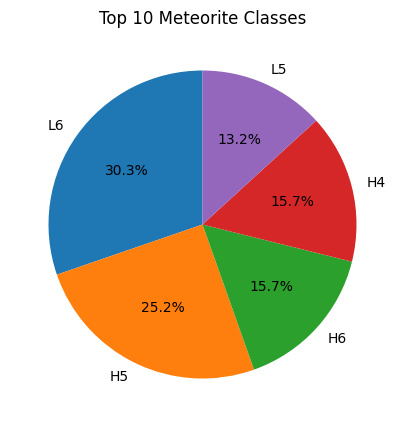

In [ ]:
# Get the top 10 most common meteorite classes
top_10_classes = df["recclass"].value_counts().nlargest(5)

# Create a pie chart for the top 10 meteorite classes
plt.figure(figsize=(5, 5))
plt.pie(top_10_classes, labels=top_10_classes.index, autopct='%1.1f%%', startangle=90)
plt.title("Top 10 Meteorite Classes")
plt.show()

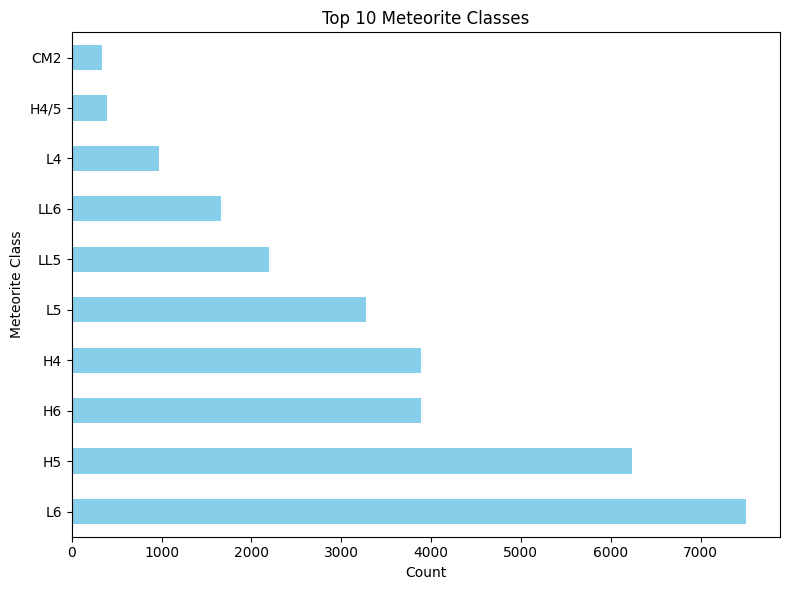

In [ ]:
# Get the top 10 most common meteorite classes
top_10_classes = df["recclass"].value_counts().nlargest(10)

# Create a stacked bar chart for the top 10 meteorite classes
top_10_classes.plot(kind='barh', figsize=(8, 6), color='skyblue')

# Add title and labels
plt.title("Top 10 Meteorite Classes")
plt.xlabel("Count")
plt.ylabel("Meteorite Class")
plt.tight_layout()  # Adjusts the layout to prevent label cut-off

plt.show()

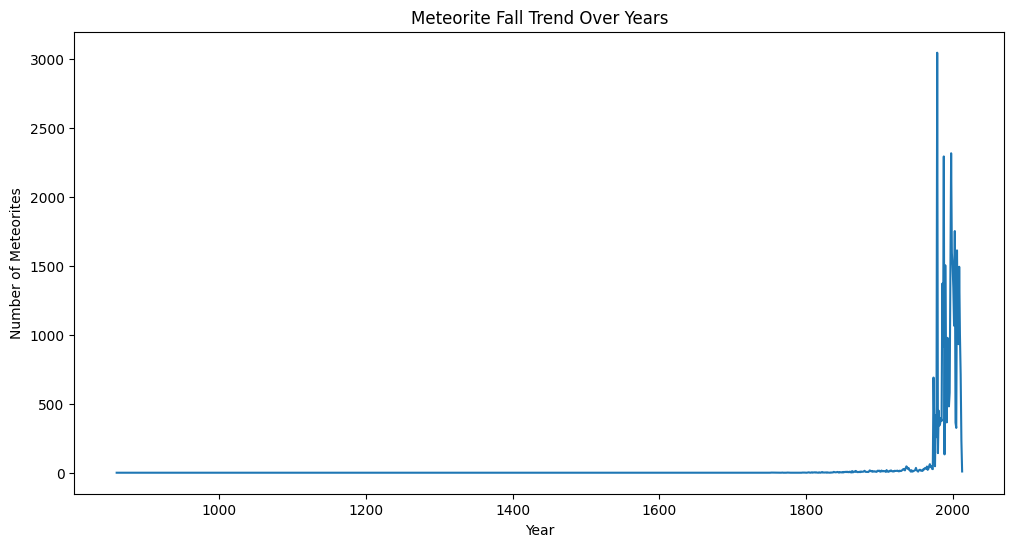

In [ ]:
meteorites_by_year = df.groupby("year").size()
meteorites_by_year.plot(kind="line", figsize=(12, 6))
plt.title("Meteorite Fall Trend Over Years")
plt.xlabel("Year")
plt.ylabel("Number of Meteorites")
plt.show()


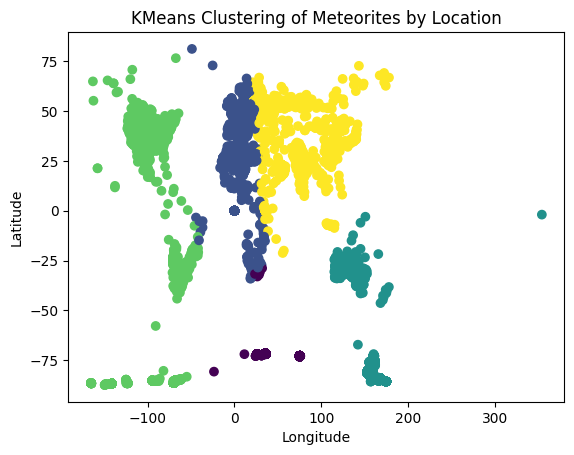

In [ ]:
from sklearn.cluster import KMeans

# Dropping rows with missing geographic data
geodata = df.dropna(subset=["reclat", "reclong"])

# KMeans clustering
kmeans = KMeans(n_clusters=5, random_state=42)
geodata["cluster"] = kmeans.fit_predict(geodata[["reclat", "reclong"]])

# Plot the clusters on a scatter plot
plt.scatter(geodata["reclong"], geodata["reclat"], c=geodata["cluster"], cmap="viridis")
plt.title("KMeans Clustering of Meteorites by Location")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()


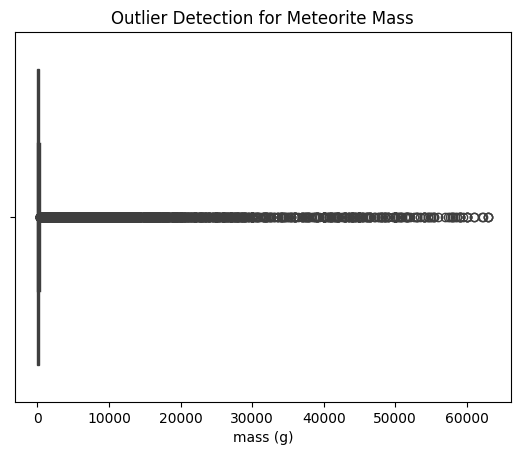

In [ ]:
# Boxplot for outlier detection in mass
sns.boxplot(x=df["mass (g)"])
plt.title("Outlier Detection for Meteorite Mass")
plt.show()


In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Prepare data for prediction
features = df[["year", "reclat", "reclong"]]
target = df["mass (g)"]
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(features, target)

# Predict mass for new data
predictions = model.predict(features)


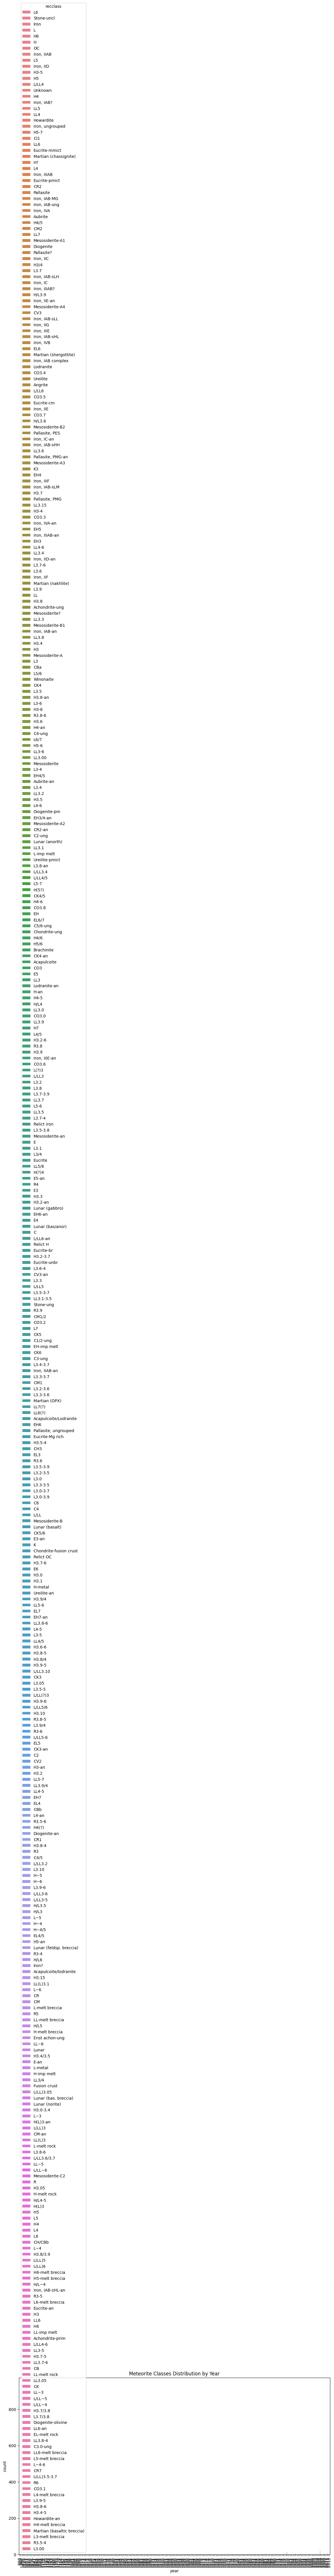

In [ ]:
plt.figure(figsize=(14, 8))
sns.countplot(data=df, x="year", hue="recclass")
plt.title("Meteorite Classes Distribution by Year")
plt.xticks(rotation=90)
plt.show()


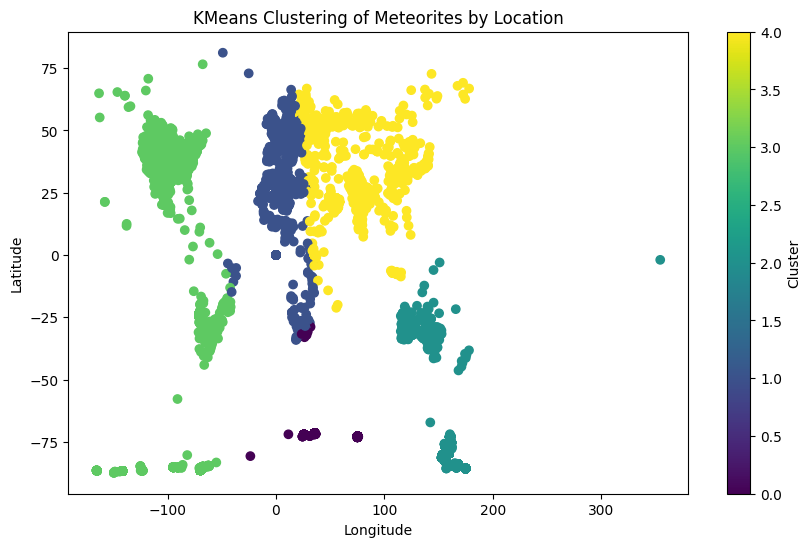

In [ ]:
from sklearn.cluster import KMeans

# Dropping rows with missing geographic data
geodata = df.dropna(subset=["reclat", "reclong"])

# Using KMeans clustering to group meteorites
kmeans = KMeans(n_clusters=5, random_state=42)
geodata["cluster"] = kmeans.fit_predict(geodata[["reclat", "reclong"]])

# Plot the clusters on a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(geodata["reclong"], geodata["reclat"], c=geodata["cluster"], cmap="viridis")
plt.title("KMeans Clustering of Meteorites by Location")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.colorbar(label="Cluster")
plt.show()
